In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [84]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [85]:
cnn = tf.keras.models.Sequential()

In [86]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [87]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [88]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [89]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [90]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [91]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [92]:
cnn.add(tf.keras.layers.Flatten())

In [93]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [94]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [95]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [96]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [98]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 5151s 2s/step - loss: 1.2962 - accuracy: 0.6166 - val_loss: 0.4573 - val_accuracy: 0.8549
Epoch 2/10
2197/2197 [==============================] - 5111s 2s/step - loss: 0.4331 - accuracy: 0.8631 - val_loss: 0.2895 - val_accuracy: 0.9052
Epoch 3/10
2197/2197 [==============================] - 5051s 2s/step - loss: 0.2581 - accuracy: 0.9164 - val_loss: 0.2193 - val_accuracy: 0.9321
Epoch 4/10
2197/2197 [==============================] - 5035s 2s/step - loss: 0.1836 - accuracy: 0.9401 - val_loss: 0.1609 - val_accuracy: 0.9473
Epoch 5/10
2197/2197 [==============================] - 4851s 2s/step - loss: 0.1372 - accuracy: 0.9549 - val_loss: 0.2408 - val_accuracy: 0.9272
Epoch 6/10
2197/2197 [==============================] - 4843s 2s/step - loss: 0.1074 - accuracy: 0.9648 - val_loss: 0.1534 - val_accuracy: 0.9520
Epoch 7/10
2197/2197 [==============================] - 4836s 2s/step - loss: 0.0887 - accuracy: 0.9712 - val_loss: 0.1694 -

In [99]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1274s 580ms/step - loss: 0.0299 - accuracy: 0.9902
Training accuracy: 0.9901842474937439


In [100]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 319s 579ms/step - loss: 0.1183 - accuracy: 0.9667
Validation accuracy: 0.9667084217071533


In [117]:
cnn.save('trained_plant_disease_model.keras')

In [102]:
training_history.history #Return Dictionary of history

{'loss': [1.2962278127670288,
  0.4331280291080475,
  0.2581150233745575,
  0.18356190621852875,
  0.13717132806777954,
  0.1074482724070549,
  0.08869302272796631,
  0.07590748369693756,
  0.06608234345912933,
  0.05250253900885582],
 'accuracy': [0.6165587902069092,
  0.8631054759025574,
  0.9163525104522705,
  0.9400668740272522,
  0.9548758864402771,
  0.9647769927978516,
  0.9711644053459167,
  0.975986897945404,
  0.9787324666976929,
  0.982616126537323],
 'val_loss': [0.45726925134658813,
  0.28945985436439514,
  0.21927669644355774,
  0.16093987226486206,
  0.2407681941986084,
  0.15338462591171265,
  0.16943134367465973,
  0.1294872760772705,
  0.11676646769046783,
  0.11833430081605911],
 'val_accuracy': [0.8549396991729736,
  0.9052469730377197,
  0.9320510029792786,
  0.947302520275116,
  0.9271568655967712,
  0.9519690275192261,
  0.9479854106903076,
  0.9618711471557617,
  0.9639198780059814,
  0.9667084217071533]}

In [103]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [104]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


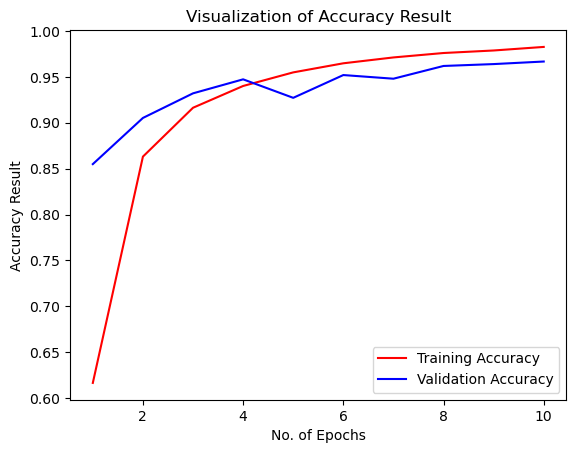

In [118]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [106]:
class_name = validation_set.class_names

In [107]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [108]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 675s 38ms/step


In [109]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [110]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [111]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [113]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [114]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.93      0.97      0.95       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.92      0.99      0.96       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

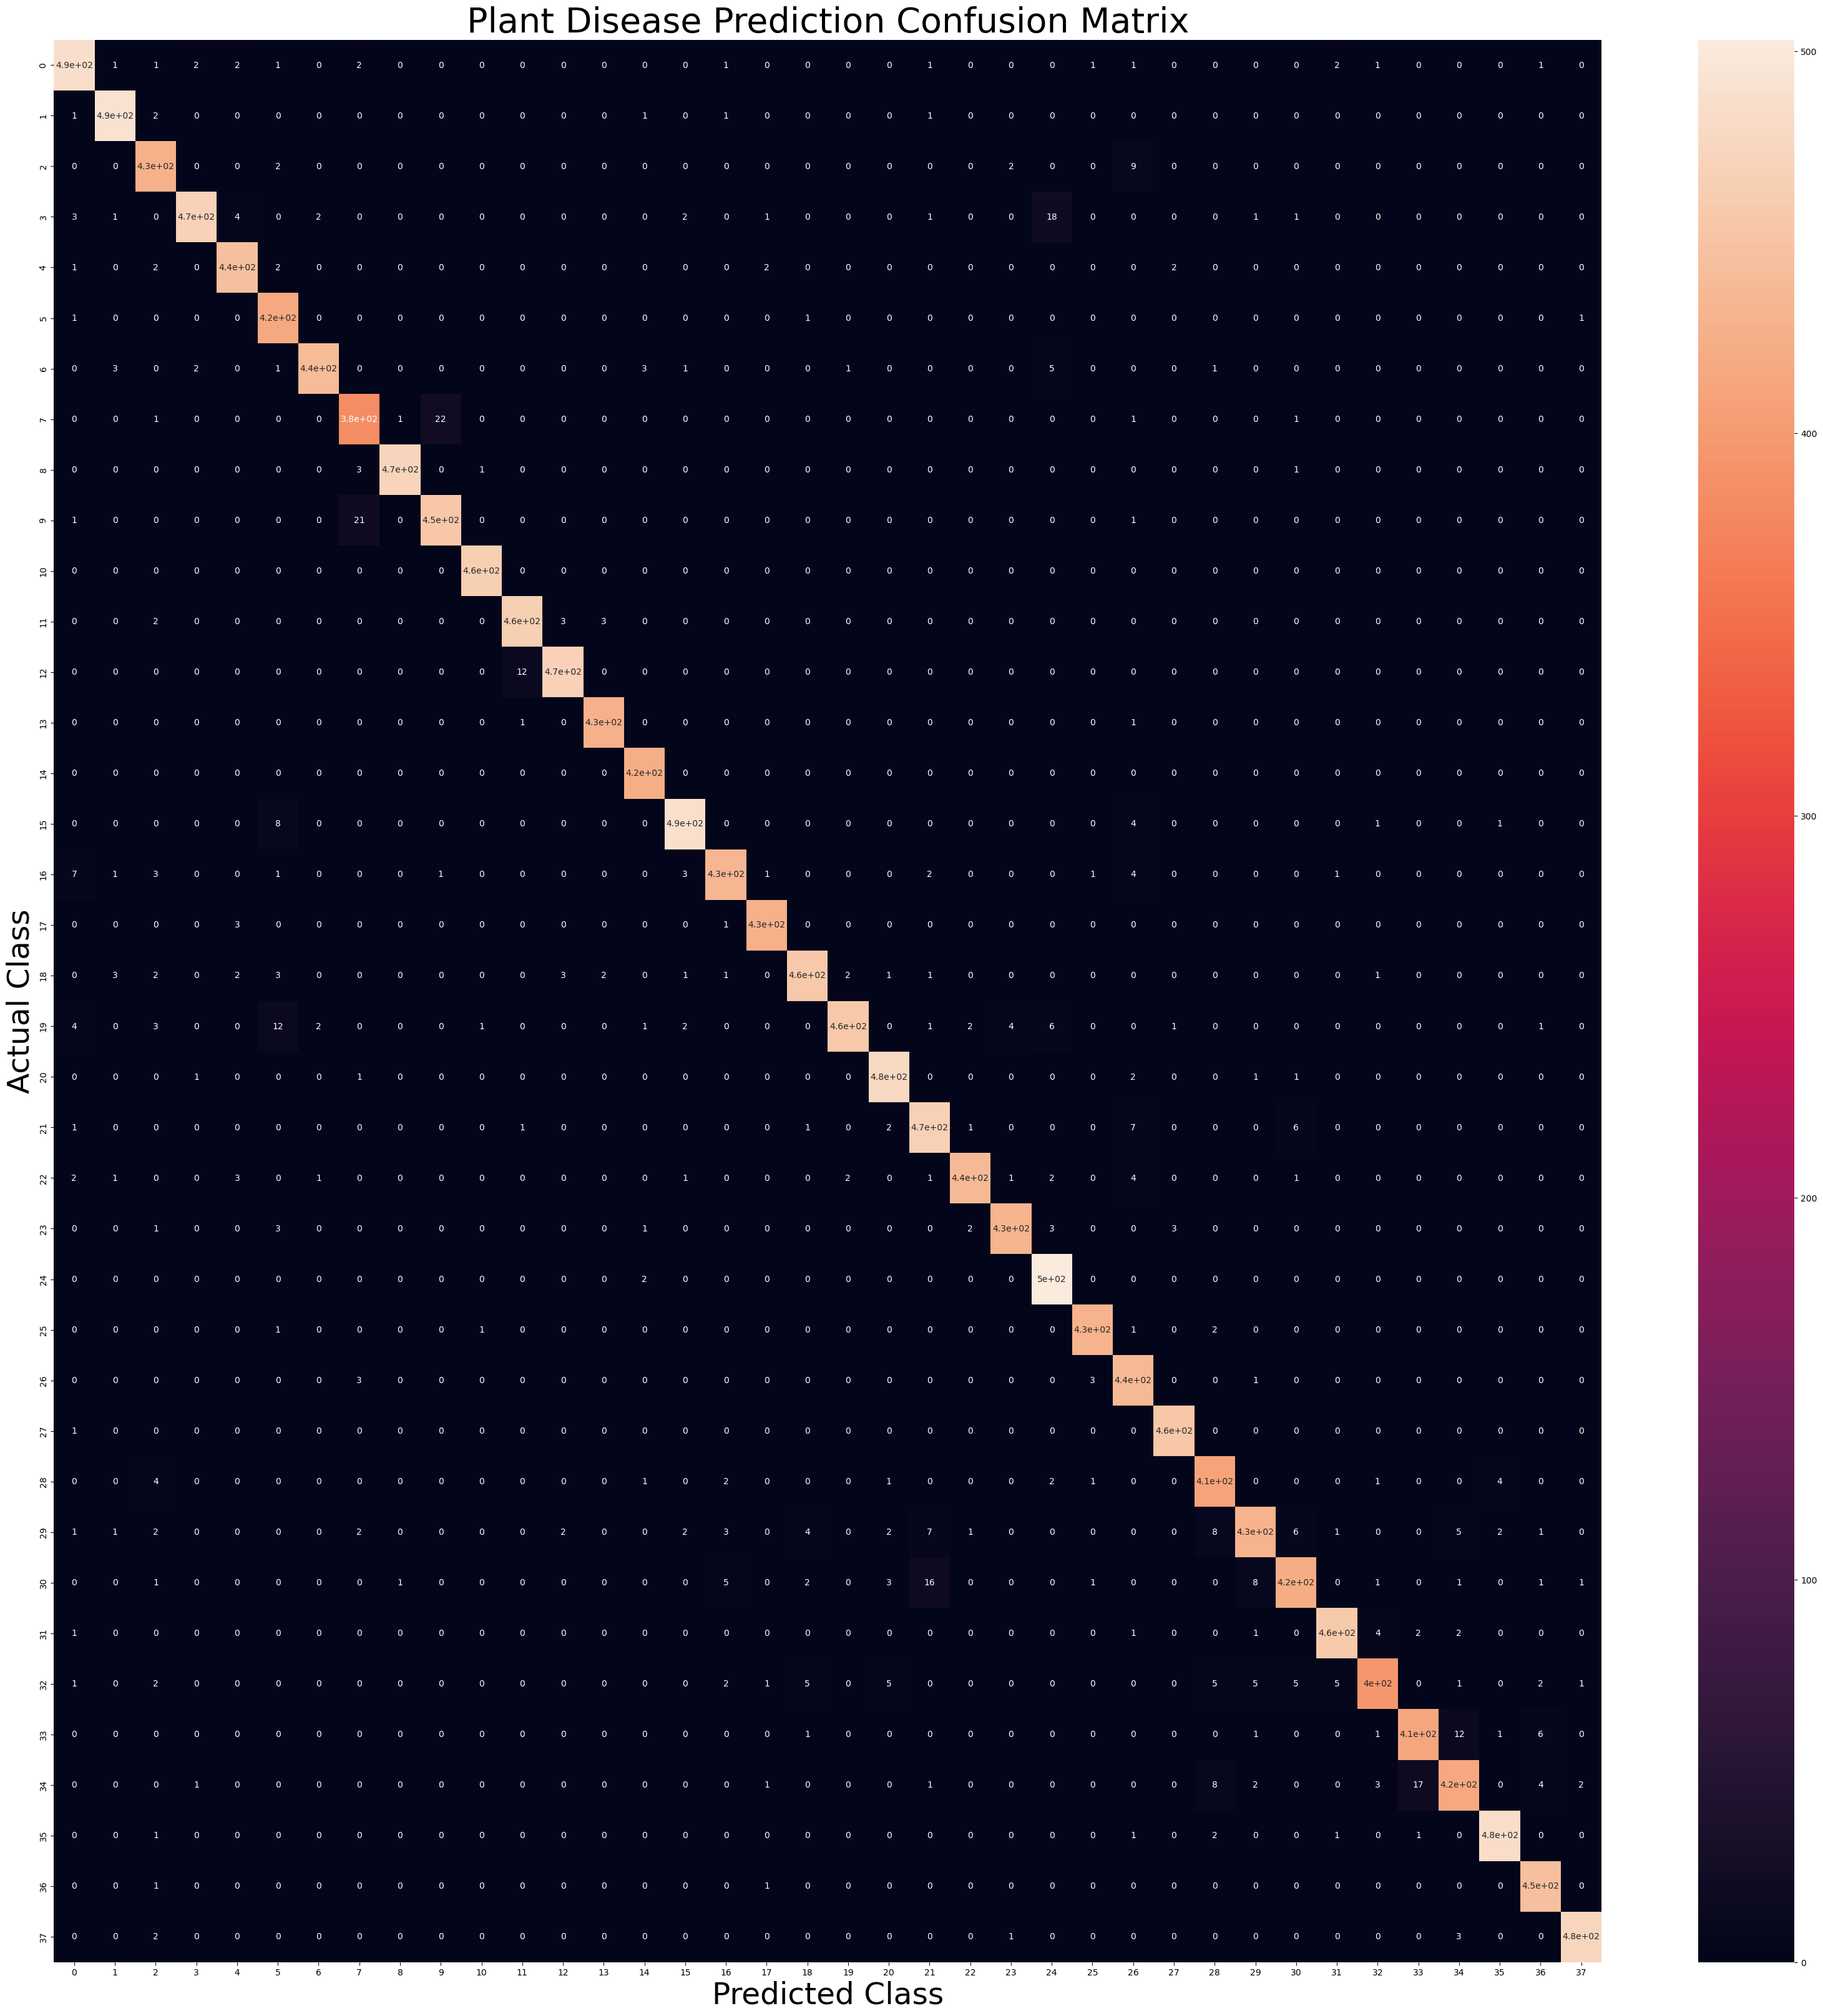

In [119]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 35)
plt.ylabel('Actual Class',fontsize = 35)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
plt.show()

In [120]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_